This Excercise is to test and compare various classifications techniques on Parkinson's Disease Dataset.

In [ ]:
#importing dependecies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/content/parkinsons.data')

In [ ]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [ ]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

###Classification using SVM

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8846153846153846


In [ ]:
# accuracy score on test data
X_test_prediction_SVM = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction_SVM)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


###Classification using Logistic Regression

In [ ]:
#importing dependencies
from sklearn.linear_model import LogisticRegression

In [ ]:
#making model
model2=LogisticRegression()

In [ ]:
model2.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
# accuracy score on test data
X_test_prediction_LR = model2.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction_LR)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8205128205128205


###Classification using gradient boosting

In [ ]:
#importing dependencies
from xgboost import XGBClassifier
model3=XGBClassifier(n_estimators=1000)

In [ ]:
model3.fit(X_train,Y_train)

XGBClassifier(n_estimators=1000)

In [ ]:
# accuracy score on test data
X_test_prediction_GR = model3.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction_GR)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


###Classification using deep neural networks

In [ ]:
#importing dependencies
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model4 = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[22]),
   
   
   


    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model4.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [ ]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=2)

In [ ]:


early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model4.fit(
    X_train, Y_train,
    validation_data=(X_valid, Y_valid),
    batch_size=64,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0,
    
     # hide the output because we have so many epochs
)

Best Validation Loss: 0.6556
Best Validation Accuracy: 0.8750


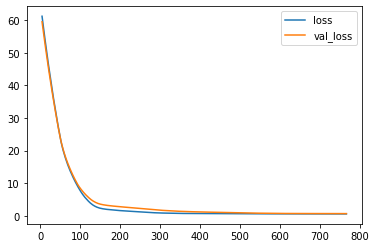

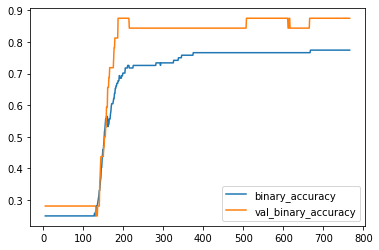

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [ ]:

y_pred = model4.predict(X_test)
X_test_prediction_DNN = np.round(y_pred).astype(int)

In [ ]:
X_test_prediction_DNN

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction_DNN)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718
